In [15]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn import linear_model
#数据是否需要标准化
scale = False

In [16]:
#载入数据
data = np.genfromtxt("LR-testSet.csv",delimiter=",")
x_data = data[:,:-1]
y_data = data[:,-1]

def plot(data):
    x0 = []
    y0 = []
    x1 = []
    y1 = []
    
    #切分不同类别的数据
    for i in range(len(data)):
        if data[i,-1] == 0:
            x0.append(data[i,0])
            y0.append(data[i,1])
        else:
            x1.append(data[i,0])
            y1.append(data[i,1])
    plt.scatter(x0,y0,c = 'b',marker = 'o' )
    plt.scatter(x1,y1,c = 'r',marker = 'x' )

In [17]:
logistic = linear_model.LogisticRegression()
logistic.fit(x_data , y_data)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

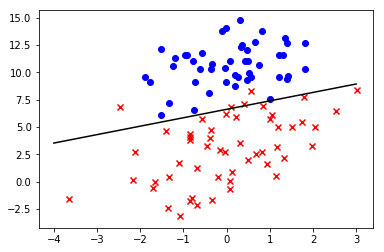

In [19]:
if scale == False:
    plot(data)
    x_test = np.array([[-4],[3]])
    y_test = (-logistic.intercept_ - x_test * logistic.coef_[0][0])/ logistic.coef_[0][1]
    plt.plot(x_test,y_test,'k')
    plt.show()

In [23]:
#预测评分
predictions = logistic.predict(x_data)
print(classification_report(y_data , predictions))

             precision    recall  f1-score   support

        0.0       0.92      1.00      0.96        47
        1.0       1.00      0.92      0.96        53

avg / total       0.96      0.96      0.96       100

